In [4]:
pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB 4.8 MB/s eta 0:01:21
   ---------------------------------------- 1.0/385.2 MB 9.0 MB/s eta 0:00:43
   ---------------------------------------- 1.7/385.2 MB 11.0 MB/s eta 0:00:35
   ---------------------------------------- 2.3/385.2 MB 11.5 MB/s eta 0:00:34
   ---------------------------------------- 3.0/385.2 MB 11.8 MB/s eta 0:00:33
   ---------------------------------------- 3.6/385.2 MB 11.9 MB/s eta 0:00:32
   ---------------------------------------- 4.0/385.2 MB 11.7 MB/s eta 0:00:33
   ---------------------------------------- 4.6/385.2 MB 11.8 MB/s eta 0:00:33
    --------------------------------------- 5.2/385.2 MB 11.9 MB/s eta 0:00:

In [11]:
pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.8 MB 1.6 MB/s eta 0:00:24
    --------------------------------------- 0.5/38.8 MB 4.1 MB/s eta 0:00:10
   - -------------------------------------- 1.1/38.8 MB 6.2 MB/s eta 0:00:07
   - -------------------------------------- 1.6/38.8 MB 8.6 MB/s eta 0:00:05
   -- ------------------------------------- 2.0/38.8 MB 7.8 MB/s eta 0:00:05
   -- ------------------------------------- 2.8/38.8 MB 8.9 MB/s eta 0:00:05
   --- ------------------------------------ 3.6/38.8 MB 10.0 MB/s eta 0:00:04
   ---- ----------------------------------- 3.9/38.8 MB 10.0 MB/s eta 0:00:04
   ---- ----------------------------------- 4.4/38.8 MB 10.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.6/38.8 MB 9.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.6/38.8 MB 9.8 MB/s eta 0:00:04
   

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 32dbbd94c26f611dc5cc6979e6b7aa1f55a64d6b463cc1dcd3c95505a63e48fe
             Got        157b1bee1e911b1eece7ff0688baec55e391f539b141c6c65af0276e3874c465



In [15]:
pip install opencv-python-headless



   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:37
    --------------------------------------- 0.6/38.8 MB 4.3 MB/s eta 0:00:09
   - -------------------------------------- 1.0/38.8 MB 5.7 MB/s eta 0:00:07
   -- ------------------------------------- 2.0/38.8 MB 9.0 MB/s eta 0:00:05
   -- ------------------------------------- 2.9/38.8 MB 10.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.8 MB 10.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.1/38.8 MB 11.4 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.8 MB 11.4 MB/s eta 0:00:04
   ----- ---------------------------------- 5.0/38.8 MB 10.9 MB/s eta 0:00:04
   ----- ---------------------------------- 5.0/38.8 MB 10.3 MB/s eta 0:00:04
   ----- ---------------------------------- 5.2/38.8 MB 9.5 MB/s eta 0:00:04
   ---

In [22]:
import pickle
import numpy as np

# Path to your pickle file
file_path = 'CNN_model.pkl'

# Open the file in read-binary mode and load the model
with open(file_path, 'rb') as file:
    model = pickle.load(file)

# Now you can use the 'model' object for predictions
print(type(model)) 


<class 'keras.src.models.sequential.Sequential'>


In [16]:
import numpy as np
import cv2
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import os

In [18]:


# ================================
# Module 1: Image Perturbation Functions
# ================================

# Function to add noise to an image
def add_noise(img, mean=0, std=25):
    noise = np.random.normal(mean, std, img.shape)
    noisy_img = np.clip(img + noise, 0, 255).astype(np.uint8)
    return noisy_img

# Function to apply Gaussian blur to an image
def apply_blur(img, kernel_size=(5, 5)):
    return cv2.GaussianBlur(img, kernel_size, 0)

# Function to change brightness of an image
def adjust_brightness(img, factor=1.5):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * factor, 0, 255)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# Extendable: Add more transformations here, e.g., rotation, flipping
def rotate_image(img, angle=45):
    center = (img.shape[1] // 2, img.shape[0] // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (img.shape[1], img.shape[0]))
    return rotated_img

In [19]:
# ================================
# Module 2: Stress Test Framework
# ================================

class StressTester:
    def __init__(self, model, test_images):
        self.model = model
        self.test_images = test_images  # List of image paths
        self.perturbations = []  # List of perturbations to apply

    def add_perturbation(self, perturb_func, **kwargs):
        self.perturbations.append((perturb_func, kwargs))

    def run_tests(self, batch_size=32):
        results = []
        for img_path in self.test_images:
            img = load_image(img_path)
            original_pred = self.model.predict(np.expand_dims(img, axis=0))

            for perturb_func, kwargs in self.perturbations:
                perturbed_img = perturb_func(img, **kwargs)
                perturbed_pred = self.model.predict(np.expand_dims(perturbed_img, axis=0))
                results.append({
                    'image': img_path,
                    'perturbation': perturb_func.__name__,
                    'original_pred': original_pred,
                    'perturbed_pred': perturbed_pred
                })
        return results


In [20]:



# ================================
# Helper Functions
# ================================

# Load an image and preprocess for the model (resizing)
def load_image(path, target_size=(224, 224)):
    img = load_img(path, target_size=target_size)
    img = img_to_array(img)
    return img


In [27]:

# Sample test images
image_folder = "Apple"
test_images = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]

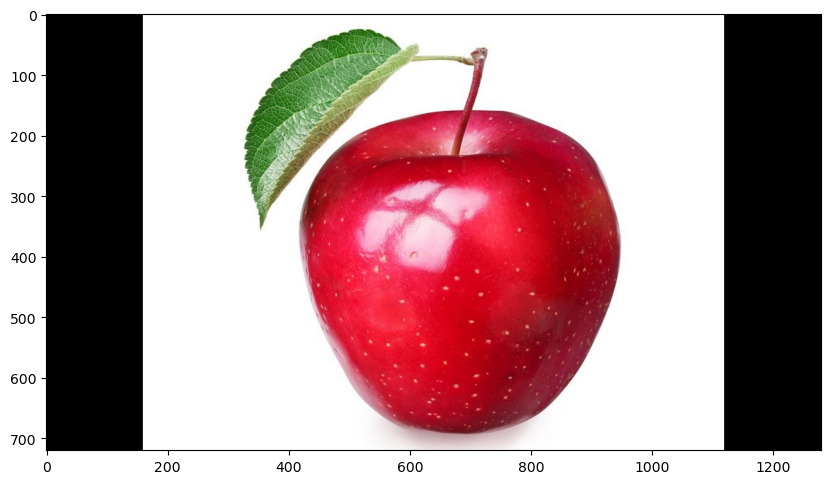

In [32]:
#to check whether the test images has loaded
img_mpl=plt.imread(test_images[3])
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
 

In [34]:
# ================================
# Example Usage with Correct Accuracy Calculation
# ================================

# Initialize stress tester
tester = StressTester(model, test_images)

# Add different perturbations to test
tester.add_perturbation(add_noise, mean=0, std=30)
tester.add_perturbation(apply_blur, kernel_size=(7, 7))
tester.add_perturbation(adjust_brightness, factor=2.0)
tester.add_perturbation(rotate_image, angle=90)

# Run tests
results = tester.run_tests()

# Print example results and calculate accuracy
correct_predictions = 0
total_tests = 0  # Count total number of perturbation tests

# Loop through all results
for i, result in enumerate(results):
    original_prediction = np.argmax(result['original_pred'])  # Get the predicted class for original image
    perturbed_prediction = np.argmax(result['perturbed_pred'])  # Get the predicted class for perturbed image

    # Compare original and perturbed predictions
    if original_prediction == perturbed_prediction:
        correct_predictions += 1

    total_tests += 1  # Each perturbation is a test

    # Print results for the first few images
    if i < 5:
        print(f"Image: {result['image']}")
        print(f"Perturbation: {result['perturbation']}")
        print(f"Original Prediction: {result['original_pred']}")
        print(f"Perturbed Prediction: {result['perturbed_pred']}")
        print()

# Calculate accuracy
accuracy = correct_predictions / total_tests  # Accuracy is correct predictions divided by total perturbation tests

# Print number of images tested and accuracy
print(f"Number of images tested: {len(test_images)}")
print(f"Number of perturbation tests: {total_tests}")
print(f"Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━